## Discover some new places in Sweden that may be suitable for IKEA department stores.

Data Extraction

In [19]:
import pandas as pd

In [20]:
encodings = ['latin1', 'cp1252']
# Get the Data from TXT
path_f = 'ikea.txt'
for encoding in encodings:
    try:
        data = pd.read_csv(path_f, sep='\t', quotechar='"', encoding=encoding)
        print("File read successfully with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Failed to read with encoding:", encoding)

File read successfully with encoding: latin1


Exploratory Data Analysis

In [21]:
pd.set_option('display.max_columns', None)
df = pd.DataFrame(data)
orginal_df = pd.DataFrame(data)
print(df.head())
print(df.shape)

   Kommun_code  Year     Kommun_name  Revenue  Employee  Population  \
0         2583  2010       Haparanda     1078       276       10059   
1          880  2010          Kalmar     3790      1621       62815   
2         1780  2010        Karlstad     4560      1910       85753   
3          114  2010  Upplands Väsby     1366       708       39289   
4          115  2010      Vallentuna      171        99       30114   

   Population_University  Percent_University  Productivity  SalesIndex  \
0                    719            0.071478     195.74174  111.075774   
1                   8716            0.138757     117.17365  390.516869   
2                  13308            0.155190     119.64794  469.856708   
3                   4419            0.112474      96.69215  140.750935   
4                   3843            0.127615      86.56347   17.619627   

   Infrast  Border  
0        0       1  
1        0       0  
2        0       0  
3        0       0  
4        0       0  
(2

Data Cleansing

In [22]:
df.isnull().sum()
print(data.dtypes)
df = df.drop(columns=['Kommun_name'])


Kommun_code                int64
Year                       int64
Kommun_name               object
Revenue                    int64
Employee                   int64
Population                 int64
Population_University      int64
Percent_University       float64
Productivity             float64
SalesIndex               float64
Infrast                    int64
Border                     int64
dtype: object


Dimension Reduction PCA

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [24]:
# # Standeredized data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[ 2.84065948,  0.        ,  0.0171844 , ...,  0.0171844 ,
        -0.22530295,  4.98748434],
       [-0.31446431,  0.        ,  1.02597326, ...,  1.02597326,
        -0.22530295, -0.20050188],
       [ 1.35295284,  0.        ,  1.31239193, ...,  1.31239193,
        -0.22530295, -0.20050188],
       ...,
       [ 1.53822141,  0.        ,  1.93284171, ...,  1.93284171,
        -0.22530295, -0.20050188],
       [ 1.5400741 ,  0.        , -0.32726194, ..., -0.32726194,
        -0.22530295, -0.20050188],
       [ 1.54192678,  0.        , -0.33693322, ..., -0.33693322,
        -0.22530295, -0.20050188]])

### Calculates the Within-Cluster Sum of Squares (WCSS) 

In [25]:
# Defining a Method to calculate WCSS - Calculates the Within-Cluster Sum of Squares (WCSS) for a given dataset
def calculate_wcss(data):
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

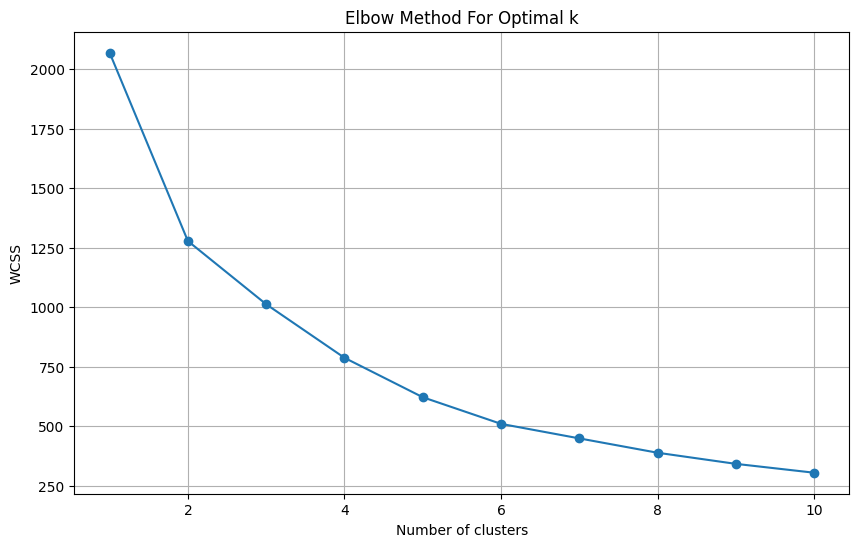

In [26]:
# Calculate the WCSS for the Scaled Data and plot to see the WCSS K value
wcss = calculate_wcss(scaled_data)

# Plotting the Elbow Method to see the 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### K-means with the optimal number of clusters found (3 clusters)

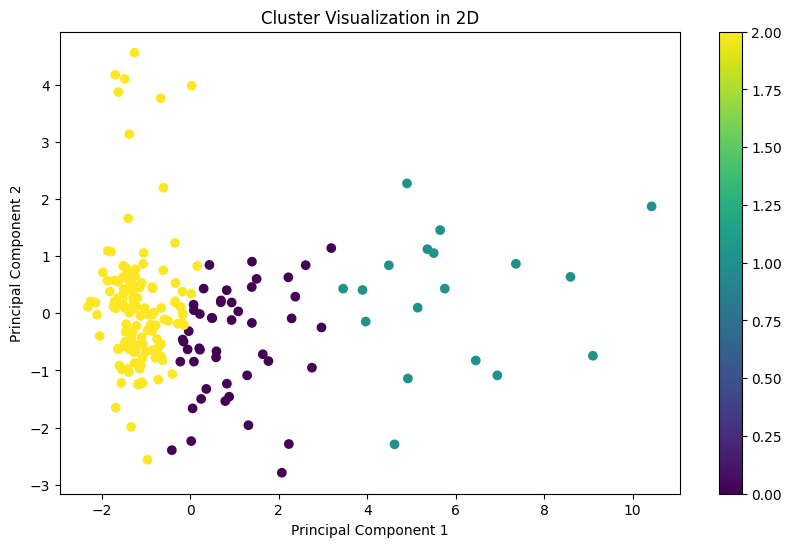

Number of data points in each cluster:
0     48
1     18
2    129
Name: count, dtype: int64


In [56]:
#PCA
pca = PCA(n_components=2)  # The number of components you want to keep
principal_components = pca.fit_transform(scaled_data)
principal_components

# Applying K-means with the optimal number of clusters found (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(principal_components)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', label=clusters)
plt.title('Cluster Visualization in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

# Count the number of data points in each cluster
cluster_counts = pd.Series(clusters).value_counts().sort_index()
print("Number of data points in each cluster:")
print(cluster_counts)

### Remove Existing IKEA Locations

In [28]:
# IKEA Locations
has_ikea_list = ('Borlänge', 'Gävle', 'Göteborg', 'Haparanda', 'Helsingborg', 'Jönköping', 'Kalmar', 'Karlstad', 'Linköping', 'Malmö', 'Stockholm', 'Sundsvall', 'Uddevalla', 'Umeå', 'Uppsala', 'Västerås', 'Älmhult', 'Örebro')

In [38]:
orginal_df = pd.DataFrame(data)
pd.set_option('display.max_columns', None)
df = orginal_df[~orginal_df['Kommun_name'].isin(has_ikea_list)]
df = df.drop(columns=['Kommun_name', 'Year'])
df

,Kommun_code,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
3,114,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
5,117,563,314,39521,5011,0.126793,89.85712,58.010817,0,0
6,120,920,454,38301,4720,0.123234,101.55604,94.795652,0,0
7,123,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0
...,...,...,...,...,...,...,...,...,...,...
201,1862,56,27,9641,483,0.050099,103.94367,5.770170,0,0
202,1863,52,33,7220,368,0.050970,78.97019,5.358015,0,0
203,1864,51,24,4931,266,0.053944,106.49585,5.254976,0,0
205,1881,152,98,20456,1598,0.078119,77.73047,15.661890,0,0


In [40]:
# Standeredized data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#PCA - Create a PCA object to reduce dimensionality to 2 components
# Transform the scaled data to its principal components
pca = PCA()
pca.fit(scaled_data)

PCA()

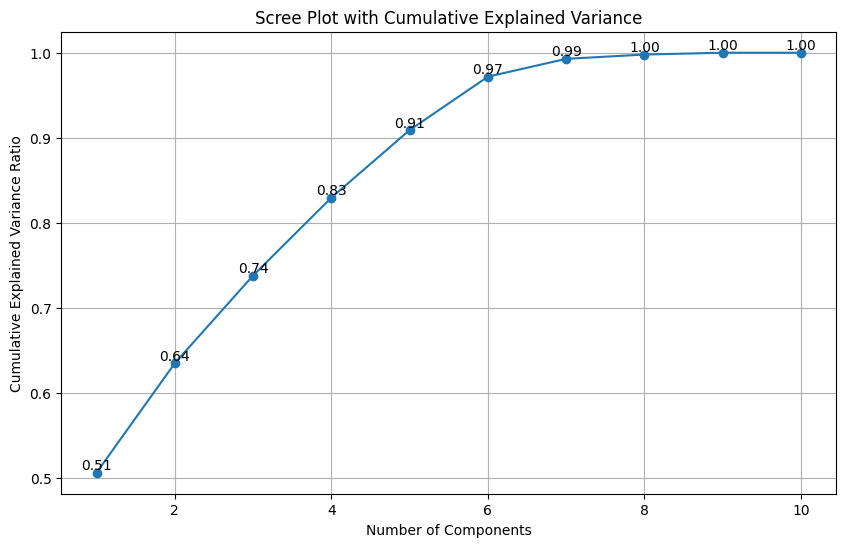

In [41]:
import numpy as np

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plotting the scree plot with accumulated percentage
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot with Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)

# Adding labels to the plot
for i, variance_ratio in enumerate(cumulative_variance_ratio):
    plt.text(i + 1, variance_ratio, f'{variance_ratio:.2f}', ha='center', va='bottom')

plt.show()

# pca = PCA(n_components=2)  # The number of components you want to keep
# principal_components = pca.fit_transform(scaled_data)
# principal_components

According to this the with 6 Principle componants will show the 97% of the total variance. But for this instance we use PCA1 and PCA2 only

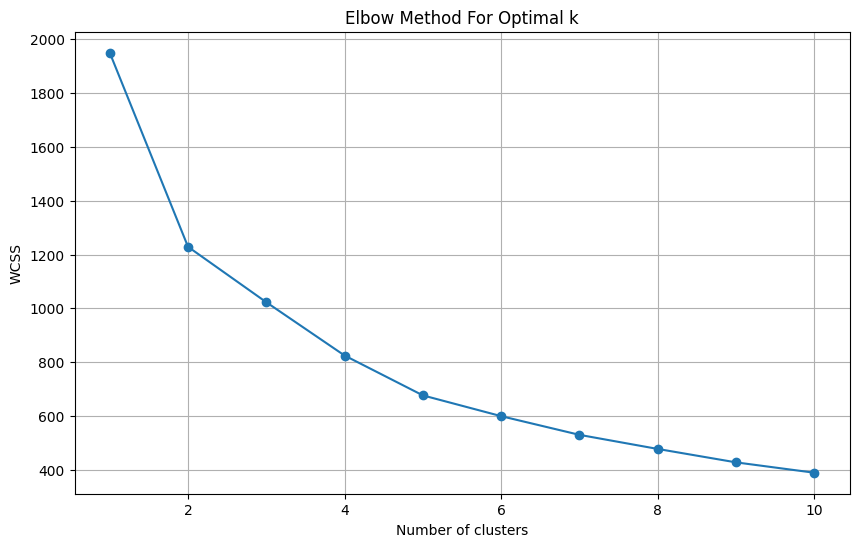

In [42]:

# Calculate the WCSS for the Scaled Data and plot to see the WCSS K value
wcss = calculate_wcss(scaled_data)

# Plotting the Elbow Method to see the 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [53]:
scaled_data.shape

(195, 10)

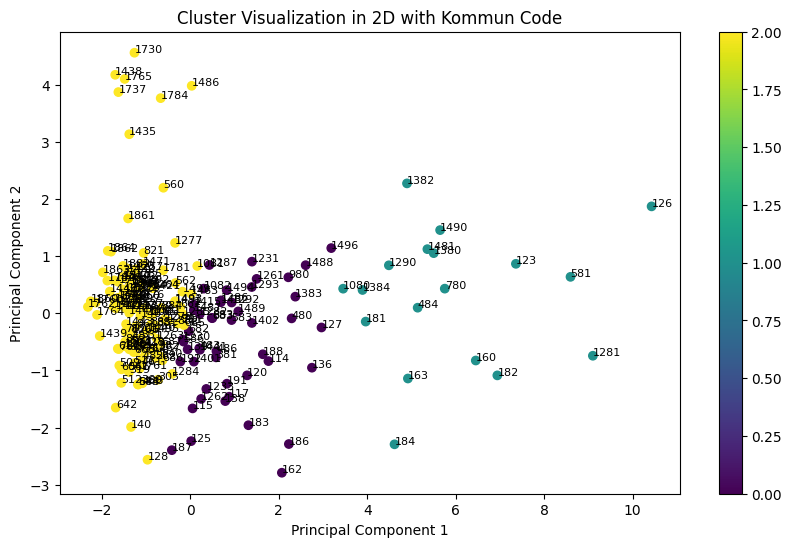

Number of data points in each cluster:
0     48
1     18
2    129
Name: count, dtype: int64


In [57]:
# Plotting the cluster visualization with commune_code annotations

#PCA
pca = PCA(n_components=2)  # The number of components you want to keep
principal_components = pca.fit_transform(scaled_data)
principal_components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', label=clusters)

# Annotate each point with commune_code
for i, txt in enumerate(df['Kommun_code']):
    plt.annotate(txt, (principal_components[i, 0], principal_components[i, 1]), fontsize=8)

plt.title('Cluster Visualization in 2D with Kommun Code')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

# Count the number of data points in each cluster
cluster_counts = pd.Series(clusters).value_counts().sort_index()
print("Number of data points in each cluster:")
print(cluster_counts)


In [58]:
orginal_df

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0


In [59]:
# Filter df for rows with Kommun_code equal to 581, 126, and 1281
filtered_df = orginal_df[orginal_df['Kommun_code'].isin([581, 126, 1281])]

# Display the filtered data
filtered_df


,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0
118,1281,2010,Lund,3438,1561,110488,29233,0.264581,110.37653,354.247229,0,0


Best Kommuns are Huddinge, Norrköping and Lund as it has the higher waightage from the PC1 and PC2

In [61]:
# Filter original_df for the specified Kommun_codes
filtered_df = df[df['Kommun_code'].isin([581, 126, 1281])]

# Get the indices of the filtered Kommuns in the original DataFrame
indices = filtered_df.index

# Get the loadings of PC1 and PC2 for the filtered Kommuns
pc1_loadings = pca.components_[0, :2]  # Only consider PC1 loadings
pc2_loadings = pca.components_[1, :2]  # Only consider PC2 loadings

# Transform the data for the filtered Kommuns using the fitted PCA model
transformed_data = pca.transform(scaled_data)[indices, :2]  # Only consider PC1 and PC2

# Calculate the weightage of PC1 and PC2 for each Kommun
weightage_pc1 = pc1_loadings.dot(transformed_data.T)
weightage_pc2 = pc2_loadings.dot(transformed_data.T)

# Print the weightage for each Kommun
for i, kommun_code in enumerate(filtered_df['Kommun_code']):
    print(f"Kommun code: {kommun_code}, Weightage from PC1: {weightage_pc1[i]}, Weightage from PC2: {weightage_pc2[i]}")


Kommun code: 126, Weightage from PC1: -0.794072050206979, Weightage from PC2: 1.2860847337884984
Kommun code: 581, Weightage from PC1: -0.025770408412064346, Weightage from PC2: -0.9656882103817731
Kommun code: 1281, Weightage from PC1: -0.005549632636702475, Weightage from PC2: 0.8082943125639561
